In [18]:
import matplotlib.pyplot as plt
import numpy as np

import meep as mp

resolution = 50  # pixels/μm

cell_size = mp.Vector3(14, 14)

pml_layers = [mp.PML(thickness=2)]

w = 1.0  # width of waveguide

geometry = [
    mp.Block(
        center=mp.Vector3(),
        size=mp.Vector3(mp.inf, w, mp.inf),
        material=mp.Medium(epsilon=5),
    )
]

fsrc = 0.35  # frequency of eigenmode or constant-amplitude source
bnum = 2  # band number of eigenmode

kpoint = mp.Vector3(x=1)

In [19]:
sources = [
    mp.EigenModeSource(
        src = mp.GaussianSource(fsrc, fwidth=0.2 * fsrc),
        center=mp.Vector3(),
        size=mp.Vector3(y=3 * w),
        direction=mp.NO_DIRECTION,
        eig_kpoint=kpoint,
        eig_band=bnum,
        eig_parity=mp.EVEN_Y + mp.ODD_Z,
        eig_match_freq=True,
    )
]

sim = mp.Simulation(
    cell_size=cell_size,
    resolution=resolution,
    boundary_layers=pml_layers,
    sources=sources,
    geometry=geometry,
    symmetries=[mp.Mirror(mp.Y)],
)


     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5,5,5)


<AxesSubplot:xlabel='X', ylabel='Y'>

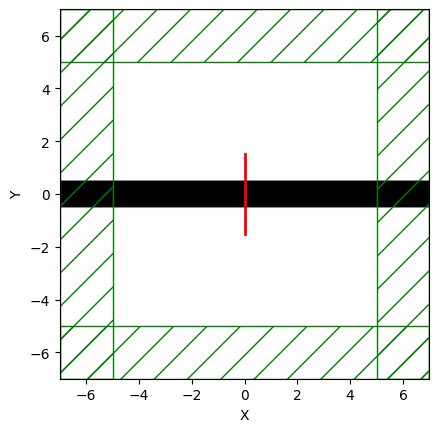

In [20]:
sim.plot2D()

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000873089 s
Working in 2D dimensions.
Computational cell is 14 x 14 x 0 with resolution 50
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5,5,5)
time for set_epsilon = 0.310708 s
-----------
MPB solved for frequency_2(1,0,0) = 0.691788 after 11 iters
MPB solved for frequency_2(0.03051,0,0) = 0.242624 after 10 iters
MPB solved for frequency_2(1.16361,0,0) = 0.750059 after 11 iters
MPB solved for frequency_2(0.0523669,0,0) = 0.245431 after 9 iters
MPB solved for frequency_2(0.697855,0,0) = 0.585624 after 13 iters
MPB solved for frequency_2(0.0463457,0,0) = 0.244511 after 11 iters
MPB solved for frequency_2(0.781131,0,0) = 0.615188 after 13 iters
MPB solved for frequency_2(0.0250161,0,0) = 0.24215 after 22 iters
MPB solved for frequency_2(1.41214,0,0) = 0.841019 after 11 

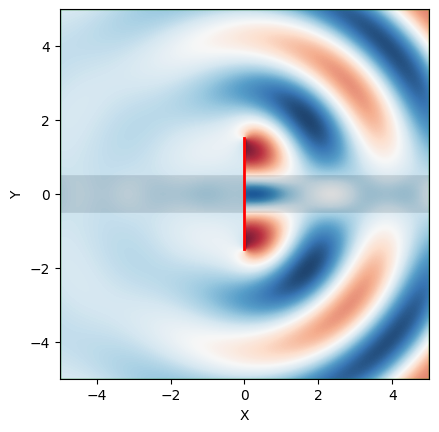

In [21]:
sim.run(until=100)
sim.plot2D(
    output_plane=mp.Volume(center=mp.Vector3(), size=mp.Vector3(10, 10)),
    fields=mp.Ez,
    field_parameters={"alpha": 0.9},
)
plt.show()

     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5,5,5)


<AxesSubplot:xlabel='X', ylabel='Y'>

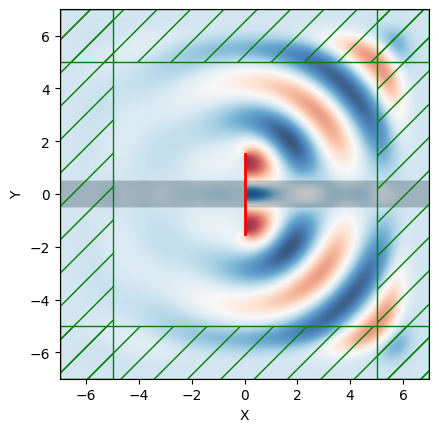

In [22]:
sim.plot2D(fields=mp.Ez)